In [1]:
import sqlite3
import pandas as pd
import numpy as np

In [ ]:
##### ==================== Task 1 ====================== ######

In [2]:
pwd

'/Users/farahshih/Documents/Codes/Python_For_Data_Science/Fu-Chi/Homework6'

In [3]:
ls

ICAO_airports.csv*   hw_6-databasing.pdf* weather.db
hw6.ipynb            top_airports.csv*


In [4]:
!head top_airports.csv

City,FAA,IATA,ICAO,Airport,Role,Enplanements
Atlanta,ATL,ATL,KATL,Hartsfield-Jackson Atlanta International Airport,P-L,43130585
Chicago,ORD,ORD,KORD,Chicago O'Hare International Airport,P-L,32171831
Los Angeles,LAX,LAX,KLAX,Los Angeles International Airport,P-L,30528737
Dallas-Fort Worth,DFW,DFW,KDFW,Dallas/Fort Worth International Airport,P-L,27100656
Denver,DEN,DEN,KDEN,Denver International Airport,P-L,25241962
New York,JFK,JFK,KJFK,John F. Kennedy International Airport,P-L,22934047
San Francisco,SFO,SFO,KSFO,San Francisco International Airport,P-L,20038679
Houston,IAH,IAH,KIAH,George Bush Intercontinental Airport,P-L,19528631
Las Vegas,LAS,LAS,KLAS,McCarran International Airport,P-L,18996738


In [4]:
top_airports = pd.read_csv("top_airports.csv")
ICAO_airports = pd.read_csv("ICAO_airports.csv")

In [5]:
top_airports.head(6)

City  FAA IATA  ICAO  \
0            Atlanta  ATL  ATL  KATL   
1            Chicago  ORD  ORD  KORD   
2        Los Angeles  LAX  LAX  KLAX   
3  Dallas-Fort Worth  DFW  DFW  KDFW   
4             Denver  DEN  DEN  KDEN   
5           New York  JFK  JFK  KJFK   

                                            Airport Role  Enplanements  
0  Hartsfield-Jackson Atlanta International Airport  P-L      43130585  
1              Chicago O'Hare International Airport  P-L      32171831  
2                 Los Angeles International Airport  P-L      30528737  
3           Dallas/Fort Worth International Airport  P-L      27100656  
4                      Denver International Airport  P-L      25241962  
5             John F. Kennedy International Airport  P-L      22934047

In [6]:
ICAO_airports.head(6)

id ident           type                                name  \
0  6523   00A       heliport                   Total Rf Heliport   
1  6524  00AK  small_airport                        Lowell Field   
2  6525  00AL  small_airport                        Epps Airpark   
3  6526  00AR       heliport  Newport Hospital & Clinic Heliport   
4  6527  00AZ  small_airport                      Cordes Airport   
5  6528  00CA  small_airport             Goldstone /Gts/ Airport   

   latitude_deg  longitude_deg  elevation_ft continent iso_country iso_region  \
0     40.070801     -74.933601          11.0       NaN          US      US-PA   
1     59.949200    -151.695999         450.0       NaN          US      US-AK   
2     34.864799     -86.770302         820.0       NaN          US      US-AL   
3     35.608700     -91.254898         237.0       NaN          US      US-AR   
4     34.305599    -112.165001        3810.0       NaN          US      US-AZ   
5     35.350498    -116.888000        3038.0       NaN          US      US-CA   

   municipality scheduled_service gps_code iata_code local_code home_link  \
0      Bensalem                no      00A       NaN        00A       NaN   
1  Anchor Point                no     00AK       NaN       00AK       NaN   
2       Harvest                no     00AL       NaN       00AL       NaN   
3       Newport                no     00AR       NaN       00AR       NaN   
4        Cordes                no     00AZ       NaN       00AZ       NaN   
5       Barstow                no     00CA       NaN       00CA       NaN   

  wikipedia_link keywords  
0            NaN      NaN  
1            NaN      NaN  
2            NaN      NaN  
3            NaN      NaN  
4            NaN      NaN  
5            NaN      NaN

In [7]:
ICAO_airports.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'iso_country', 'iso_region',
       'municipality', 'scheduled_service', 'gps_code', 'iata_code',
       'local_code', 'home_link', 'wikipedia_link', 'keywords'],
      dtype='object')

In [8]:
top_airports_f = pd.merge(top_airports, ICAO_airports[['id','name','ident','latitude_deg','longitude_deg']], how='left',
                          left_on='ICAO', right_on='ident')

In [33]:
top_airports.shape

(50, 7)

In [34]:
top_airports_f.shape

(50, 12)

In [35]:
top_airports_f

City  FAA IATA  ICAO  \
0                                Atlanta  ATL  ATL  KATL   
1                                Chicago  ORD  ORD  KORD   
2                            Los Angeles  LAX  LAX  KLAX   
3                      Dallas-Fort Worth  DFW  DFW  KDFW   
4                                 Denver  DEN  DEN  KDEN   
5                               New York  JFK  JFK  KJFK   
6                          San Francisco  SFO  SFO  KSFO   
7                                Houston  IAH  IAH  KIAH   
8                              Las Vegas  LAS  LAS  KLAS   
9                                Phoenix  PHX  PHX  KPHX   
10                             Charlotte  CLT  CLT  KCLT   
11                                 Miami  MIA  MIA  KMIA   
12                               Orlando  MCO  MCO  KMCO   
13                                Newark  EWR  EWR  KEWR   
14                     Detroit / Romulus  DTW  DTW  KDTW   
15                           Minneapolis  MSP  MSP  KMSP   
16             Seattle / Tacoma (SeaTac)  SEA  SEA  KSEA   
17                          Philadelphia  PHL  PHL  KPHL   
18                                Boston  BOS  BOS  KBOS   
19                              New York  LGA  LGA  KLGA   
20  Washington D.C. / Chantilly / Dulles  IAD  IAD  KIAD   
21               Baltimore / Glen Burnie  BWI  BWI  KBWI   
22                       Fort Lauderdale  FLL  FLL  KFLL   
23                        Salt Lake City  SLC  SLC  KSLC   
24                              Honolulu  HNL  HNL  PHNL   
25    Washington D.C. / Arlington County  DCA  DCA  KDCA   
26                               Chicago  MDW  MDW  KMDW   
27                             San Diego  SAN  SAN  KSAN   
28                                 Tampa  TPA  TPA  KTPA   
29                              Portland  PDX  PDX  KPDX   
30                             St. Louis  STL  STL  KSTL   
31                           Kansas City  MCI  MCI  KMCI   
32                               Memphis  MEM  MEM  KMEM   
33                             Cleveland  CLE  CLE  KCLE   
34                               Oakland  OAK  OAK  KOAK   
35                   San Juan / Carolina  SJU  SJU  TJSJ   
36                               Raleigh  RDU  RDU  KRDU   
37                             Nashville  BNA  BNA  KBNA   
38                            Sacramento  SMF  SMF  KSMF   
39                               Houston  HOU  HOU  KHOU   
40                             Santa Ana  SNA  SNA  KSNA   
41                                Austin  AUS  AUS  KAUS   
42                              San Jose  SJC  SJC  KSJC   
43                           New Orleans  MSY  MSY  KMSY   
44                            Pittsburgh  PIT  PIT  KPIT   
45                           San Antonio  SAT  SAT  KSAT   
46                             Covington  CVG  CVG  KCVG   
47                             Milwaukee  MKE  MKE  KMKE   
48                                Dallas  DAL  DAL  KDAL   
49                          Indianapolis  IND  IND  KIND   

                                              Airport Role  Enplanements  \
0    Hartsfield-Jackson Atlanta International Airport  P-L      43130585   
1                Chicago O'Hare International Airport  P-L      32171831   
2                   Los Angeles International Airport  P-L      30528737   
3             Dallas/Fort Worth International Airport  P-L      27100656   
4                        Denver International Airport  P-L      25241962   
5               John F. Kennedy International Airport  P-L      22934047   
6                 San Francisco International Airport  P-L      20038679   
7                George Bush Intercontinental Airport  P-L      19528631   
8                      McCarran International Airport  P-L      18996738   
9            Phoenix Sky Harbor International Airport  P-L      18907171   
10            Charlotte/Douglas International Airport  P-L      18629181   
11                        Miami International Airport  P-L     

In [39]:
top_airports_f = top_airports_f[['id','City','FAA','IATA','ICAO','Airport','Role','Enplanements','latitude_deg','longitude_deg']]

In [40]:
top_airports_f.head(3)

id         City  FAA IATA  ICAO  \
0  3384      Atlanta  ATL  ATL  KATL   
1  3754      Chicago  ORD  ORD  KORD   
2  3632  Los Angeles  LAX  LAX  KLAX   

                                            Airport Role  Enplanements  \
0  Hartsfield-Jackson Atlanta International Airport  P-L      43130585   
1              Chicago O'Hare International Airport  P-L      32171831   
2                 Los Angeles International Airport  P-L      30528737   

   latitude_deg  longitude_deg  
0     33.636700     -84.428101  
1     41.978600     -87.904800  
2     33.942501    -118.407997

In [26]:
top_airports_f.to_sql?

In [37]:
connection = sqlite3.connect("weather.db")
cursor = connection.cursor()
cursor.execute('''DROP TABLE IF EXISTS TOPairports''')
sql_cmd = """CREATE TABLE TOPairports (City TEXT, FAA TEXT, IATA TEXT, ICAO TEXT, Airport TEXT, Role TEXT, 
Enplanements INT, id INT, latitude_deg INT, longitude_deg INT)"""
cursor.execute(sql_cmd)

In [38]:
## read data into sqlite db
top_airports_f.to_sql("TOPairports", connection, if_exists='append', index=False)

In [ ]:
##### ==================== Task 2 ====================== ######

In [7]:
url = 'http://www.wunderground.com/history/airport/KSFO/2013/9/1/MonthlyHistory.html?format=1'
feature = ['PDT', 'Max TemperatureC', 'Min TemperatureC', ' Mean Humidity', 'Precipitationmm', ' CloudCover']
data = pd.read_csv(url)[feature]

In [8]:
data.head(6)

PDT  Max TemperatureC  Min TemperatureC   Mean Humidity  \
0  2013-9-1                23                14              68   
1  2013-9-2                24                17              77   
2  2013-9-3                23                16              65   
3  2013-9-4                23                16              72   
4  2013-9-5                22                16              74   
5  2013-9-6                29                13              58   

  Precipitationmm   CloudCover  
0            0.00            4  
1            0.00            6  
2            0.00            2  
3            0.00            4  
4            0.00            3  
5            0.00            0

In [17]:
data["ICAO"]="KSFO"

In [18]:
data.head(6)

PDT  Max TemperatureC  Min TemperatureC   Mean Humidity  \
0  2013-9-1                23                14              68   
1  2013-9-2                24                17              77   
2  2013-9-3                23                16              65   
3  2013-9-4                23                16              72   
4  2013-9-5                22                16              74   
5  2013-9-6                29                13              58   

  Precipitationmm   CloudCover  ICAO  
0            0.00            4  KSFO  
1            0.00            6  KSFO  
2            0.00            2  KSFO  
3            0.00            4  KSFO  
4            0.00            3  KSFO  
5            0.00            0  KSFO

In [19]:
data.columns = ['PDT', 'MaxTemp', 'MinTemp', 'Mean_Humidity','Precipitation', 'CloudCover', "ICAO"]

In [20]:
data.columns

Index(['PDT', 'MaxTemp', 'MinTemp', 'Mean_Humidity', 'Precipitation',
       'CloudCover', 'ICAO'],
      dtype='object')

In [85]:
connection = sqlite3.connect("weather.db")
cursor = connection.cursor()
#cursor.execute('''DROP TABLE IF EXISTS Weather''')
sql_cmd = """CREATE TABLE Weather (ICAO TEXT, PDT DATE, MaxTemp INT, MinTemp INT, Mean_Humidity INT, Precipitation INT,
CloudCover INT)"""
cursor.execute(sql_cmd)

In [86]:
## read data into sqlite db
# data.to_sql("Weather", connection, if_exists='append', index=False)

In [87]:
##### Parpare to load all cities and monthes data into DB

In [46]:
ICAO_ls = top_airports_f['ICAO']

In [47]:
ICAO_ls

0     KATL
1     KORD
2     KLAX
3     KDFW
4     KDEN
5     KJFK
6     KSFO
7     KIAH
8     KLAS
9     KPHX
10    KCLT
11    KMIA
12    KMCO
13    KEWR
14    KDTW
15    KMSP
16    KSEA
17    KPHL
18    KBOS
19    KLGA
20    KIAD
21    KBWI
22    KFLL
23    KSLC
24    PHNL
25    KDCA
26    KMDW
27    KSAN
28    KTPA
29    KPDX
30    KSTL
31    KMCI
32    KMEM
33    KCLE
34    KOAK
35    TJSJ
36    KRDU
37    KBNA
38    KSMF
39    KHOU
40    KSNA
41    KAUS
42    KSJC
43    KMSY
44    KPIT
45    KSAT
46    KCVG
47    KMKE
48    KDAL
49    KIND
Name: ICAO, dtype: object

In [90]:
pd.date_range(end='2008/9/30', periods=len(data) , freq='D')

DatetimeIndex(['2008-09-01', '2008-09-02', '2008-09-03', '2008-09-04',
               '2008-09-05', '2008-09-06', '2008-09-07', '2008-09-08',
               '2008-09-09', '2008-09-10', '2008-09-11', '2008-09-12',
               '2008-09-13', '2008-09-14', '2008-09-15', '2008-09-16',
               '2008-09-17', '2008-09-18', '2008-09-19', '2008-09-20',
               '2008-09-21', '2008-09-22', '2008-09-23', '2008-09-24',
               '2008-09-25', '2008-09-26', '2008-09-27', '2008-09-28',
               '2008-09-29', '2008-09-30'],
              dtype='datetime64[ns]', freq='D')

In [45]:
month_start = pd.date_range('2008/1/1', periods=100, freq='M')
month_start
# for d in range(len(month_start)):
#     dt = "/" + pd.Series(month_start.format())[d].replace('-','/') + '/'
#     print(dt)

DatetimeIndex(['2008-01-31', '2008-02-29', '2008-03-31', '2008-04-30',
               '2008-05-31', '2008-06-30', '2008-07-31', '2008-08-31',
               '2008-09-30', '2008-10-31', '2008-11-30', '2008-12-31',
               '2009-01-31', '2009-02-28', '2009-03-31', '2009-04-30',
               '2009-05-31', '2009-06-30', '2009-07-31', '2009-08-31',
               '2009-09-30', '2009-10-31', '2009-11-30', '2009-12-31',
               '2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
               '2010-09-30', '2010-10-31', '2010-11-30', '2010-12-31',
               '2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31',
               '2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
      

In [27]:
def readTemp(ICAO_ls, month_start, feature, conn):
    for ICAO in ICAO_ls:
        for d in range(len(month_start)):
            ## formating date and create url
            date = pd.Series(month_start.format())[d].replace('-','/')
            dt = "/" + date + '/'
            url = "http://www.wunderground.com/history/airport/" + ICAO + dt + "MonthlyHistory.html?format=1"
            ## grab url data
            data = pd.read_csv(url)[feature]
            
            ## add ICAO code and daily calender 
            data["ICAO"] = ICAO
            data["PDT"] = pd.date_range(end=date, periods=len(data) , freq='D')
            ## change column names
            data.columns = ['MaxTemp', 'MinTemp', 'Mean_Humidity','Precipitation', 'CloudCover', 'ICAO','PDT']
            
            ## transfer data into sql db
            data.to_sql("Weather", connection, if_exists='append', index=False)
            print(ICAO+" "+date)

In [28]:
connection = sqlite3.connect("weather.db")

In [44]:
feature = ['Max TemperatureC', 'Min TemperatureC', ' Mean Humidity', 'Precipitationmm', ' CloudCover']
readTemp(ICAO_ls, month_start, feature, connection)

KIAH 2008/11/30
KIAH 2008/12/31
KIAH 2009/01/31
KIAH 2009/02/28
KIAH 2009/03/31
KIAH 2009/04/30
KIAH 2009/05/31
KIAH 2009/06/30
KIAH 2009/07/31
KIAH 2009/08/31
KIAH 2009/09/30
KIAH 2009/10/31
KIAH 2009/11/30
KIAH 2009/12/31
KIAH 2010/01/31
KIAH 2010/02/28
KIAH 2010/03/31
KIAH 2010/04/30
KIAH 2010/05/31
KIAH 2010/06/30
KIAH 2010/07/31
KIAH 2010/08/31
KIAH 2010/09/30
KIAH 2010/10/31
KIAH 2010/11/30
KIAH 2010/12/31
KIAH 2011/01/31
KIAH 2011/02/28
KIAH 2011/03/31
KIAH 2011/04/30
KIAH 2011/05/31
KIAH 2011/06/30
KIAH 2011/07/31
KIAH 2011/08/31
KIAH 2011/09/30
KIAH 2011/10/31
KIAH 2011/11/30
KIAH 2011/12/31
KIAH 2012/01/31
KIAH 2012/02/29
KIAH 2012/03/31
KIAH 2012/04/30
KIAH 2012/05/31
KIAH 2012/06/30
KIAH 2012/07/31
KIAH 2012/08/31
KIAH 2012/09/30
KIAH 2012/10/31
KIAH 2012/11/30
KIAH 2012/12/31
KIAH 2013/01/31
KIAH 2013/02/28
KIAH 2013/03/31
KIAH 2013/04/30
KIAH 2013/05/31
KIAH 2013/06/30
KIAH 2013/07/31
KIAH 2013/08/31
KIAH 2013/09/30
KIAH 2013/10/31
KIAH 2013/11/30
KIAH 2013/12/31
KIAH 201

In [ ]:
###### ============= Task 4 ==================== ####

In [2]:
import statsmodels.api as sm

In [3]:
connection = sqlite3.connect("weather.db")

In [4]:
cursor = connection.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('TOPairports',), ('Weather',)]


In [13]:
ICAO_ls = pd.read_sql_query("SELECT ICAO from TOPairports", connection)
ICAO_ls

ICAO
0   KATL
1   KORD
2   KLAX
3   KDFW
4   KDEN
5   KJFK
6   KSFO
7   KIAH
8   KLAS
9   KPHX
10  KCLT
11  KMIA
12  KMCO
13  KEWR
14  KDTW
15  KMSP
16  KSEA
17  KPHL
18  KBOS
19  KLGA
20  KIAD
21  KBWI
22  KFLL
23  KSLC
24  PHNL
25  KDCA
26  KMDW
27  KSAN
28  KTPA
29  KPDX
30  KSTL
31  KMCI
32  KMEM
33  KCLE
34  KOAK
35  TJSJ
36  KRDU
37  KBNA
38  KSMF
39  KHOU
40  KSNA
41  KAUS
42  KSJC
43  KMSY
44  KPIT
45  KSAT
46  KCVG
47  KMKE
48  KDAL
49  KIND

In [6]:
KOAK = pd.read_sql_query("SELECT PDT,MaxTemp,CloudCover from Weather WHERE ICAO = 'KOAK'", connection)
KOAK.head(6)

PDT  MaxTemp  CloudCover
0  2008-01-01 00:00:00       13           3
1  2008-01-02 00:00:00       14           6
2  2008-01-03 00:00:00       14           8
3  2008-01-04 00:00:00       13           7
4  2008-01-05 00:00:00       11           6
5  2008-01-06 00:00:00       11           6

In [7]:
KSFO = pd.read_sql_query("SELECT PDT,MaxTemp,CloudCover from Weather WHERE ICAO = 'KSFO'", connection)
KSFO.head(6)

PDT  MaxTemp  CloudCover
0  2008-01-01 00:00:00       12           2
1  2008-01-02 00:00:00       12           4
2  2008-01-03 00:00:00       14           8
3  2008-01-04 00:00:00       15           7
4  2008-01-05 00:00:00       12           6
5  2008-01-06 00:00:00       14           6

In [12]:
sm.OLS?

In [17]:
model = sm.OLS(KSFO.CloudCover, KOAK.CloudCover).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             CloudCover   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 7.105e+04
Date:                Tue, 21 Jun 2016   Prob (F-statistic):               0.00
Time:                        16:56:13   Log-Likelihood:                -3947.1
No. Observations:                3043   AIC:                             7896.
Df Residuals:                    3042   BIC:                             7902.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
CloudCover     0.9427      0.004    266.555      0.0

In [7]:
query1 = "SELECT ICAO, PDT, CloudCover from Weather"
df = pd.read_sql_query(query1, connection)

In [8]:
df.shape

(152150, 3)

In [34]:
x = np.array(df[df["ICAO"]=="KOAK"].CloudCover)
y = np.array(df[df["ICAO"]=="KSFO"].CloudCover)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 7.105e+04
Date:                Tue, 21 Jun 2016   Prob (F-statistic):               0.00
Time:                        17:48:50   Log-Likelihood:                -3947.1
No. Observations:                3043   AIC:                             7896.
Df Residuals:                    3042   BIC:                             7902.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.9427      0.004    266.555      0.0

In [ ]:
for i in ICAO_ls.ICAO[0:50]:
    y = np.array(df[df["ICAO"]==i].CloudCover)
    for j in ICAO_ls.ICAO[0:50]:
        if i==j:
            continue
        x = np.array(df[df["ICAO"]==j].CloudCover)
        model = sm.OLS(y, x).fit()
        print([i, j])
        print(model.summary())

['KATL', 'KORD']
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 21 Jun 2016   Prob (F-statistic):                nan
Time:                        17:59:17   Log-Likelihood:                    nan
No. Observations:                3043   AIC:                               nan
Df Residuals:                    3043   BIC:                               nan
Df Model:                          -1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1                nan        nan   

In [14]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [86]:
KSFO.dtypes

PDT           object
MaxTemp        int64
CloudCover     int64
dtype: object

In [70]:
KSFO['PDT'] = pd.to_datetime(KSFO['PDT'], format='%Y-%m-%d')
KOAK['PDT'] = pd.to_datetime(KOAK['PDT'], format='%Y-%m-%d')

In [71]:
KSFO.dtypes

PDT           datetime64[ns]
MaxTemp                int64
CloudCover             int64
dtype: object

In [72]:
KSFO.set_index('PDT', inplace=True) 

In [44]:
from pylab import rcParams
rcParams['figure.figsize'] = 30, 10

In [ ]:
### ??? how to set different colors for two cities
### run linear regression using one city's MaxTemp to predict another city

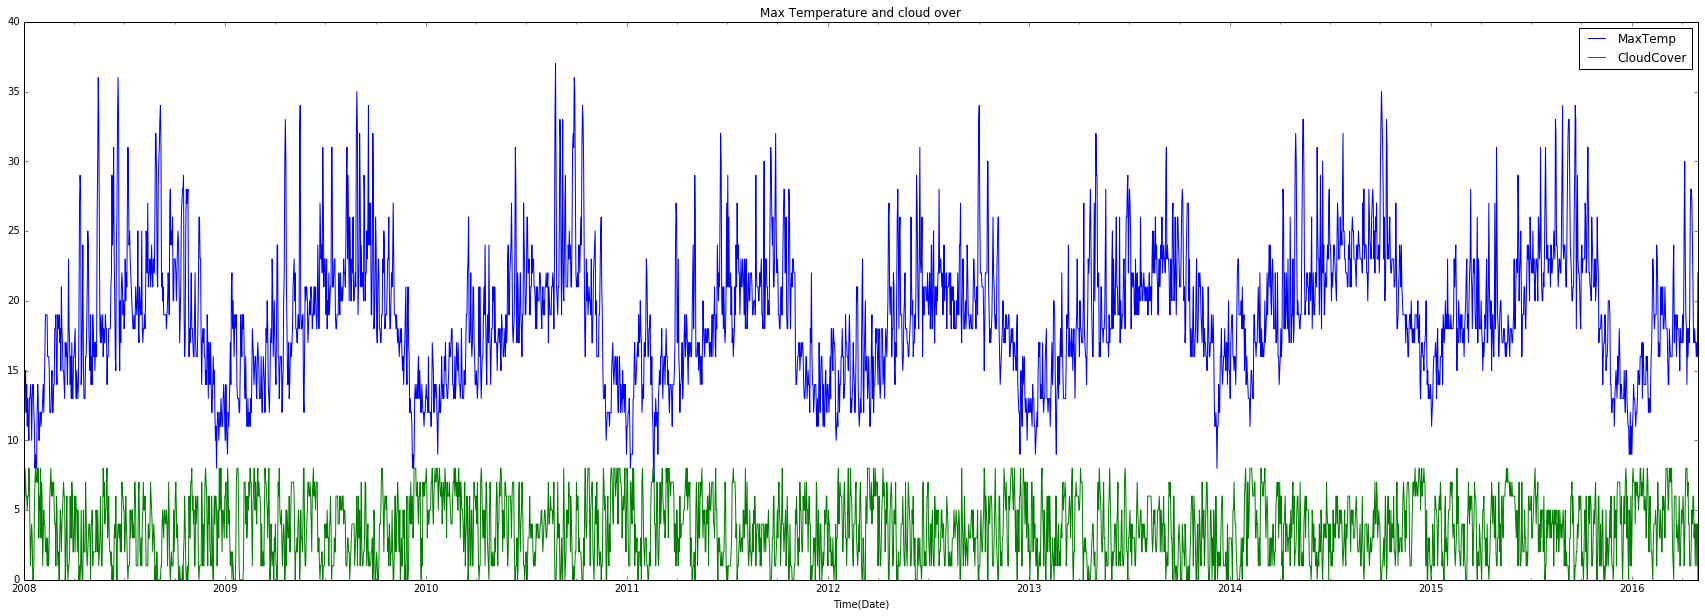

In [75]:
KSFO.plot()
#plt.plot(KSFO)
plt.title('Max Temperature and cloud over')
plt.xlabel('Time(Date)')